#### Importing modules

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import pickle

#### Importing files as Pandas-dataframe

In [75]:
train = pd.read_csv("train.csv")

#### Dropping columns of low importance for model

In [76]:
columns_to_drop = ["PassengerId","Name","Ticket","Cabin","Embarked","SibSp","Parch"]
train = train.drop(columns_to_drop, axis=1)
print(train.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')
Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')
Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')
Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')


#### Exploring datasets

In [77]:
print(train.dtypes)
print(train.isna().sum())
print(train.Sex.value_counts())

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object
Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64
male      577
female    314
Name: Sex, dtype: int64
Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object
Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64
male      577
female    314
Name: Sex, dtype: int64
Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object
Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64
male      577
female    314
Name: Sex, dtype: int64
Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object
Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64
male      577
fe

#### Feature engineering

In [78]:
# Categorising Age column

bins = [0,12,65,100]
categories_age_str = ["child", "young", "old"]
categories_age_int = [0,1,2]
def age_to_categorical_number(age):
    if age in range(0,13):
        return 0
    elif age in range(13,65):
        return 1
    elif age in range(65,100):
        return 2
train["Age"] = train["Age"].apply(lambda x: age_to_categorical_number(x))
# Categorising Sex column

def sex_to_number(sex):
    if sex == "male":
        return 0
    else:
        return 1
train["Sex"] = train["Sex"].apply(lambda x: sex_to_number(x))

#### Plotting for some insight

<AxesSubplot:>

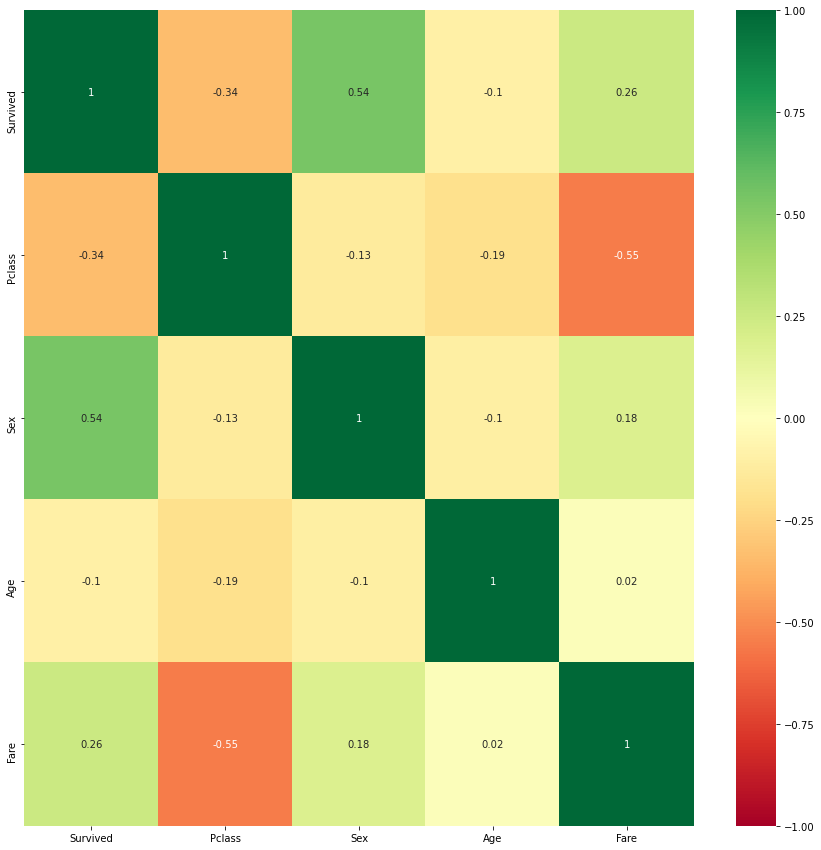

<AxesSubplot:>

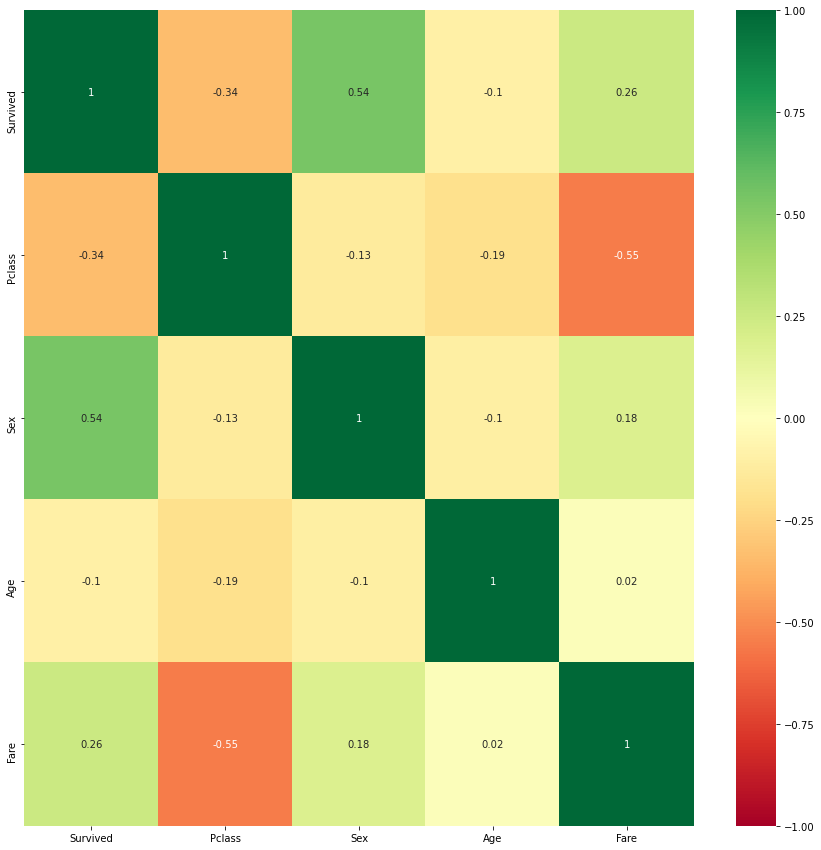

<AxesSubplot:>

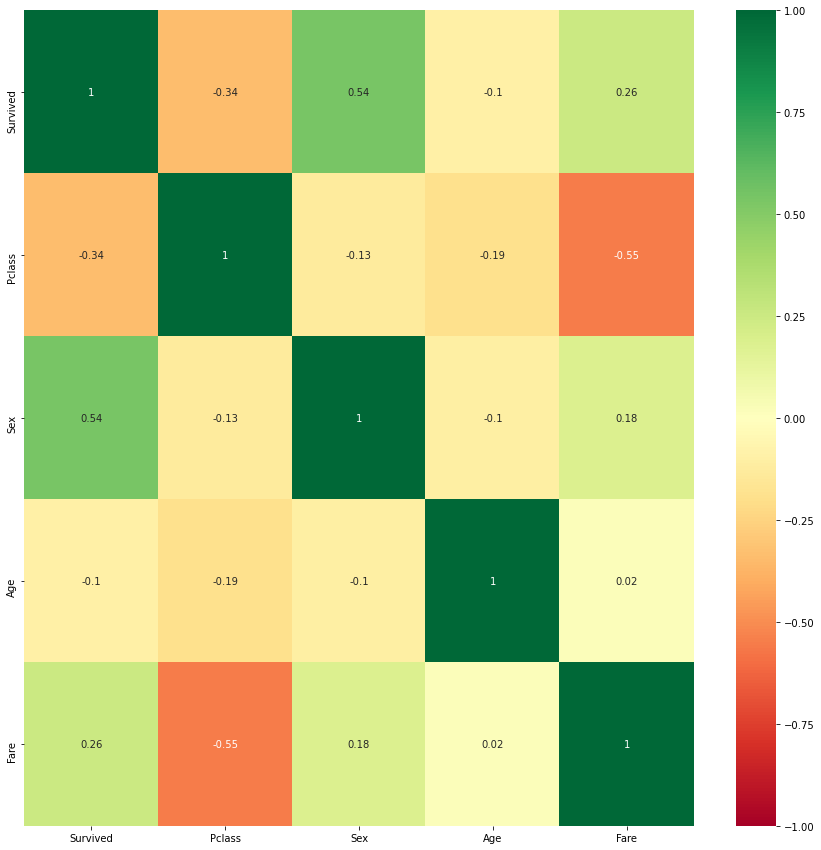

<AxesSubplot:>

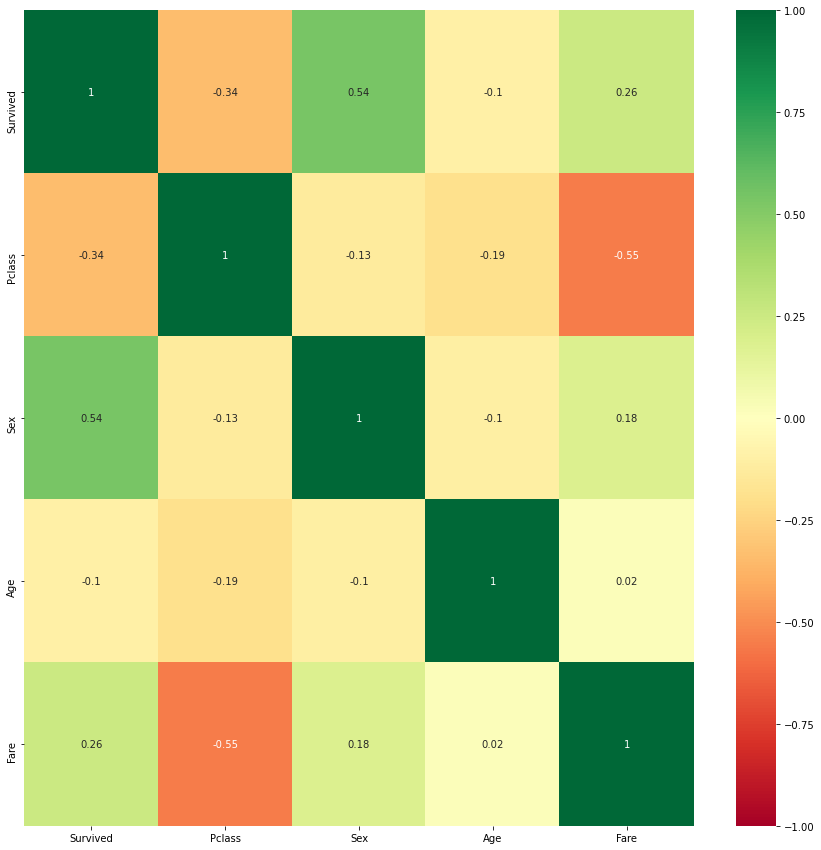

In [79]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), cmap="RdYlGn",annot=True, vmin=-1)

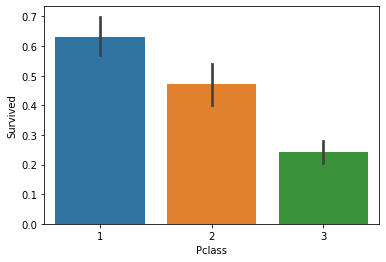

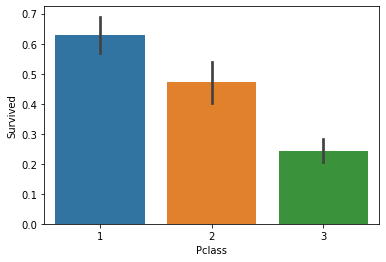

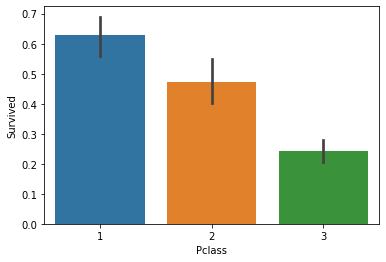

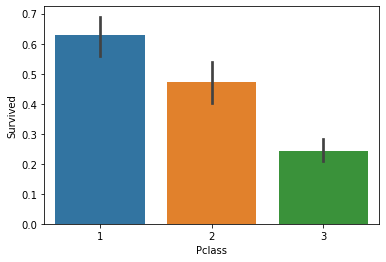

In [80]:
"""sns.barplot(data=train, x="Age", y="Survived")
plt.show()"""
sns.barplot(data=train, x="Pclass", y="Survived")
plt.show()

#### Splitting into 2 DataFrames for making 2 models

In [81]:
train_without_Fare = train.drop(["Fare"],axis=1)
train_without_Fare = train_without_Fare.dropna()

#### Splitting into train and test

In [84]:
print(train_without_Fare.columns)
y = train_without_Fare["Survived"].values
X = train_without_Fare.drop(["Survived"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

Index(['Survived', 'Pclass', 'Sex', 'Age'], dtype='object')


#### Random forest

In [83]:
forest_without_Fare = RandomForestClassifier(n_estimators=200, random_state=2)
forest_without_Fare.fit(X_train, y_train)

pickle.dump(forest_without_Fare,open("model.pkl","wb"))

In [13]:
# Testing if website is operational.
from flask import json
import requests

url = "http://127.0.0.1:5000/"
# sample data
data = {'Pclass': 3
      , 'Age': 50
      , 'Sex':0}
data = json.dumps(data)
send_request = requests.post(url, data)
print(send_request)

# Prediction checken
print(send_request.json())

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001B16F9A8E50>: Failed to establish a new connection: [WinError 10061] Kan geen verbinding maken omdat de doelcomputer de verbinding actief heeft geweigerd'))